In [1]:
import pandas as pd

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.sentiment import SentimentIntensityAnalyzer

In [3]:
import matplotlib.pyplot as plt
from collections import Counter 

In [22]:
import re

In [4]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\veroi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\veroi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\veroi\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [5]:
# Read data
# use read_csv to read csv file, not read_table
df = pd.read_csv('sephora_reviews_0420.csv')
df

C:\Users\veroi\AppData\Local\Temp\ipykernel_21108\1644079824.py:3: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('sephora_reviews_0420.csv')


,author_id,rating,is_recommended,review_text,review_title,skin_type,product_id,product_name,brand_name,price_usd,product_rating,reviews,ingredients,highlights,primary_category,secondary_category,tertiary_category,year,month,day
0,1741593524,5.0,1.0,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,dry,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0,5.0000,1,"['Water (Aqua), Dipropylene Glycol, Peg-6 Capr...",['Clean at Sephora'],Skincare,Cleansers,NaN,2023,2,1
1,5061282401,5.0,1.0,My review title says it all! I get so excited ...,New Favorite Routine,dry,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,4.3508,16118,"['Diisostearyl Malate, Hydrogenated Polyisobut...","['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Lip Balms & Treatments,NaN,2023,3,21
2,6083038851,5.0,1.0,I’ve always loved this formula for a long time...,Can't go wrong with any of them,combination,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,4.3508,16118,"['Diisostearyl Malate, Hydrogenated Polyisobut...","['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Lip Balms & Treatments,NaN,2023,3,20
3,47056667835,5.0,1.0,"If you have dry cracked lips, this is a must h...",A must have !!!,combination,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,4.3508,16118,"['Diisostearyl Malate, Hydrogenated Polyisobut...","['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Lip Balms & Treatments,NaN,2023,3,20
4,42802569154,4.0,1.0,The scent isn’t my favourite but it works grea...,Great!,normal,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0,4.3508,16118,"['Diisostearyl Malate, Hydrogenated Polyisobut...","['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Lip Balms & Treatments,NaN,2023,3,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749475,2276253200,5.0,1.0,Consider salicylic acid your secret weapon for...,No Title,combination,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0,5.0000,1,"['Aqua/Water/Eau, Propanediol, Isononyl Isonon...","['Good for: Dullness/Uneven Texture', 'Good fo...",Skincare,Treatments,Blemish & Acne Treatments,2023,3,13
749476,28013163278,5.0,1.0,I’ve been using this as my only moisturizer fo...,No Title,combination,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0,5.0000,1,"['Aqua/Water/Eau, Propanediol, Isononyl Isonon...","['Good for: Dullness/Uneven Texture', 'Good fo...",Skincare,Treatments,Blemish & Acne Treatments,2023,3,13
749477,1539813076,5.0,1.0,I got breakouts whenever it’s my time of month...,No Title,combination,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0,5.0000,1,"['Aqua/Water/Eau, Propanediol, Isononyl Isonon...","['Good for: Dullness/Uneven Texture', 'Good fo...",Skincare,Treatments,Blemish & Acne Treatments,2023,3,13
749478,5595682861,5.0,1.0,I love this!!! I don’t get actual acne just an...,No Title,oily,P505392,Multi Action Clear Acne Clearing Treatment Lot...,StriVectin,49.0,5.0000,1,"['Aqua/Water/Eau, Propanediol, Isononyl Isonon...","['Good for: Dullness/Uneven Texture', 'Good fo...",Skincare,Treatments,Blemish & Acne Treatments,2023,3,13


In [6]:
most_popular_categories = df.groupby(['skin_type', 'secondary_category'])['secondary_category'].count().reset_index(name='count').sort_values(['skin_type', 'count'], ascending=[True, False]).groupby('skin_type').head(1)

print(most_popular_categories)

      skin_type secondary_category   count
6   combination       Moisturizers  108364
19          dry       Moisturizers   41540
32       normal       Moisturizers   26199
45         oily       Moisturizers   21924


In [8]:
df_filtered = df[['skin_type', 'product_id', 'product_name', 'product_rating']]

# unique producsts
def top_3_unique_products(group):
    unique_products = group.drop_duplicates(subset='product_id')
    return unique_products.nlargest(3, 'product_rating')

# group by skin_type
top_skin_type = df_filtered.groupby('skin_type', group_keys=False).apply(top_3_unique_products)

print(top_skin_type)

          skin_type product_id  \
746466  combination    P480150   
746603  combination    P502818   
746885  combination    P505316   
0               dry    P504322   
746469          dry    P480150   
746608          dry    P502818   
746467       normal    P480150   
746606       normal    P502818   
746891       normal    P505316   
746602         oily    P502818   
746924         oily    P505316   
747746         oily    P504049   

                                             product_name  product_rating  
746466  Liquid Gold Midnight Reboot Serum with 14% Gly...             5.0  
746603  LUNA 4 Facial Cleansing & Firming Massage for ...             5.0  
746885         Aquarius BHA + Blue Tansy Clarity Cleanser             5.0  
0                          Gentle Hydra-Gel Face Cleanser             5.0  
746469  Liquid Gold Midnight Reboot Serum with 14% Gly...             5.0  
746608  LUNA 4 Facial Cleansing & Firming Massage for ...             5.0  
746467  Liquid Gold Midni

In [9]:
name = top_skin_type['product_name'].unique()
print(name)

['Liquid Gold Midnight Reboot Serum with 14% Glycolic Acid and Tripeptide-5'
 'LUNA 4 Facial Cleansing & Firming Massage for Balanced Skin'
 'Aquarius BHA + Blue Tansy Clarity Cleanser'
 'Gentle Hydra-Gel Face Cleanser'
 'Skin Filter Daily Brightening Phyto-Retinol + AHA Serum']


In [10]:
idp_unique = top_skin_type['product_id'].unique()

for product_id in idp_unique:
    print(product_id)

P480150
P502818
P505316
P504322
P504049


In [11]:
# List of product_ids
product_ids = ['P480150', 'P502818', 'P505316', 'P504322', 'P504049']

# Filter the DataFrame based on the product_ids
filtered_reviews = df[df['product_id'].isin(product_ids)][['product_id', 'review_text']]

# Display the filtered reviews
print(filtered_reviews)


       product_id                                        review_text
0         P504322  I use this with the Nudestix “Citrus Clean Bal...
746466    P480150  I really really enjoyed this product! Beware o...
746467    P480150  I’ve never felt more compelled in my life to w...
746468    P480150  This stuff is amazing. I got it first as a fre...
746469    P480150  Next to sunscreen, this is my bff. Feels elega...
...           ...                                                ...
747754    P504049  This product is amazing!! Instantly gives me g...
747755    P504049  I’ve been using this serum for about a month, ...
747756    P504049  This product has been part of my routine for t...
747757    P504049  My FAVE serum EVER, EVER! My skin looks plump ...
747758    P504049  This product is amazing ! It’s really changed ...

[103 rows x 2 columns]


In [12]:
# Function to tokenize and clean text
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())
    cleaned_tokens = [token for token in tokens if token.isalnum() and token not in stop_words]
    return cleaned_tokens

# Function to extract keywords
def extract_keywords(reviews):
    all_words = [word for review in reviews for word in preprocess_text(review)]
    freq_dist = FreqDist(all_words)
    return freq_dist.most_common(10)  # Extract top 5 most common words

# Function to perform sentiment analysis
def analyze_sentiment(reviews):
    sia = SentimentIntensityAnalyzer()
    sentiment_scores = [sia.polarity_scores(review)['compound'] for review in reviews]
    average_sentiment = sum(sentiment_scores) / len(sentiment_scores)
    return average_sentiment

# Analyze reviews for each product_id
for product_id in product_ids:
    product_reviews = filtered_reviews[filtered_reviews['product_id'] == product_id]['review_text'].tolist()
    print("Product ID:", product_id)
    
    # Extract keywords
    keywords = extract_keywords(product_reviews)
    print("Top keywords:", [keyword[0] for keyword in keywords])
    
    # Perform sentiment analysis
    sentiment_score = analyze_sentiment(product_reviews)
    print("Average sentiment score:", sentiment_score)
    
    print("\n")

Product ID: P480150
Top keywords: ['skin', 'one', 'product', 'love', 'serum', 'feel', 'glow', 'never', 'recommend', 'stuff']
Average sentiment score: 0.8425333333333335


Product ID: P502818
Top keywords: ['skin', 'massage', 'love', 'cleansing', 'face', 'using', 'foreo', 'use', 'skincare', 'really']
Average sentiment score: 0.9366874999999999


Product ID: P505316
Top keywords: ['skin', 'cleanser', 'love', 'face', 'herbivore', 'like', 'gentle', 'clean', 'using', 'really']
Average sentiment score: 0.8735309090909091


Product ID: P504322
Top keywords: ['melt', 'skin', 'use', 'based', 'nudestix', 'citrus', 'clean', 'balm', 'double', 'cleanse']
Average sentiment score: 0.9392


Product ID: P504049
Top keywords: ['skin', 'product', 'serum', 'using', 'love', 'face', 'hydrated', 'amazing', 'like', 'feel']
Average sentiment score: 0.7513




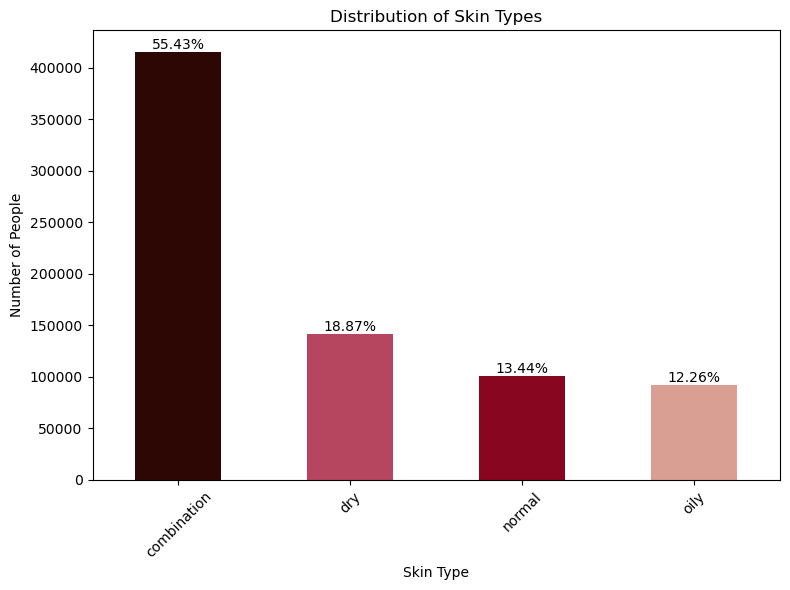

In [13]:
# Calculate the distribution of skin types
skin_type_distribution = df['skin_type'].value_counts()

# Calculate the percentage of clients for each skin type
total_clients = skin_type_distribution.sum()
skin_type_percentage = (skin_type_distribution / total_clients) * 100

# Define more sober colors for the bars
colors = ['#2c0703', '#b6465f', '#890620','#da9f93']

# Create the bar plot with the new color palette
plt.figure(figsize=(8, 6))
skin_type_distribution.plot(kind='bar', color=colors)
plt.title('Distribution of Skin Types')
plt.xlabel('Skin Type')
plt.ylabel('Number of People')
plt.xticks(rotation=45)

# Add percentage labels above each bar
for i, value in enumerate(skin_type_distribution):
    plt.text(i, value + 1, f'{skin_type_percentage[i]:.2f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()



In [14]:

avg_rating = df.groupby(['skin_type', 'secondary_category'])['product_rating'].mean().reset_index(name='avg_rating')

category_counts = df.groupby(['skin_type', 'secondary_category']).size().reset_index(name='count')

merged_data = pd.merge(category_counts, avg_rating, on=['skin_type', 'secondary_category'])


merged_data['weighted_score'] = merged_data['count'] * merged_data['avg_rating']

merged_data_sorted = merged_data.sort_values(['skin_type', 'weighted_score'], ascending=[True, False])

top_categories = merged_data_sorted.groupby('skin_type').head(3)

print(top_categories)

      skin_type secondary_category   count  avg_rating  weighted_score
6   combination       Moisturizers  108364    4.332755     469514.7083
10  combination         Treatments   88649    4.317745     382763.7613
0   combination          Cleansers   81538    4.342361     354067.4020
19          dry       Moisturizers   41540    4.339567     180265.6305
23          dry         Treatments   28250    4.321213     122074.2638
13          dry          Cleansers   25069    4.341275     108831.4354
32       normal       Moisturizers   26199    4.334063     113548.1240
36       normal         Treatments   20938    4.317748      90405.0161
26       normal          Cleansers   17866    4.338976      77520.1494
45         oily       Moisturizers   21924    4.318418      94676.9889
49         oily         Treatments   20201    4.292432      86711.4167
39         oily          Cleansers   19632    4.324248      84893.6386


In [15]:
# Calculate average ratings by skin type
average_ratings = df.groupby('skin_type')['rating'].mean()

print(average_ratings)

skin_type
combination    4.315242
dry            4.299411
normal         4.286825
oily           4.271802
Name: rating, dtype: float64


In [16]:
# Filter out rows where is_recommended is 1.0
recommended_products = df[df['is_recommended'] == 1.0]

# Group by skin_type and calculate the proportion of recommended products for each skin type
proportions_by_skin_type = recommended_products.groupby('skin_type').size() / df.groupby('skin_type').size()

print("Proportion of recommended products by skin type:")
print(proportions_by_skin_type)

Proportion of recommended products by skin type:
skin_type
combination    0.846701
dry            0.839267
normal         0.835397
oily           0.835247
dtype: float64


In [17]:
# Grouping by skin type and calculating the average price for each group
average_price_by_skin_type = df.groupby('skin_type')['price_usd'].mean()

print("Average Price by Skin Type:")
print(average_price_by_skin_type)

Average Price by Skin Type:
skin_type
combination    49.749523
dry            50.005900
normal         51.069968
oily           46.294471
Name: price_usd, dtype: float64


In [18]:
# Calculate the mean recommendation rate for each skin type
correlation = df.groupby('skin_type')['is_recommended'].mean()

# Print the correlation between skin type and product recommendation
print("Correlation between skin type and product recommendation:")
print(correlation)


Correlation between skin type and product recommendation:
skin_type
combination    0.846701
dry            0.839267
normal         0.835397
oily           0.835247
Name: is_recommended, dtype: float64


In [23]:
# Filter the DataFrame by the year 2022
df_2022 = df[df['year'] == 2022]

# Initialize a dictionary to store the most talked-about themes for each skin type
skin_type_themes = {'dry': Counter(), 'combination': Counter(), 'normal': Counter(), 'oily': Counter()}

# Iterate over each row of the DataFrame filtered by the year 2022
for index, row in df_2022.iterrows():
    skin_type = row['skin_type']
    highlights = row['highlights']
    # Extract the themes from the highlights
    pattern = r"'(.*?)'"
    phrases = re.findall(pattern, highlights)
    # Count the frequency of each theme for the current skin type
    skin_type_themes[skin_type].update(phrases)

# Print the most talked-about themes for each skin type
for skin_type, themes_count in skin_type_themes.items():
    print(f"Skin Type: {skin_type}")
    print(themes_count.most_common(5))  # Print the top 5 most common themes
    print()


Skin Type: dry
[('Good for: Dullness/Uneven Texture', 10833), ('Clean at Sephora', 10473), ('Good for: Dryness', 10387), ('Vegan', 10242), ('Hyaluronic Acid', 8927)]

Skin Type: combination
[('Good for: Dullness/Uneven Texture', 32034), ('Clean at Sephora', 29196), ('Vegan', 28235), ('Good for: Dryness', 26236), ('Good for: Anti-Aging', 24754)]

Skin Type: normal
[('Good for: Dullness/Uneven Texture', 8076), ('Clean at Sephora', 7558), ('Vegan', 7449), ('Good for: Dryness', 6945), ('Good for: Anti-Aging', 6833)]

Skin Type: oily
[('Good for: Dullness/Uneven Texture', 6415), ('Clean at Sephora', 6359), ('Vegan', 5758), ('Good for: Dryness', 5012), ('Cruelty-Free', 4892)]

